In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file
import os
from PIL import Image
from IPython.display import display
from matplotlib.patches import Circle
from astropy.wcs import WCS 
from astropy.coordinates import SkyCoord
import astropy.units as u
#import regions
from matplotlib.patches import Circle
from astropy.nddata import Cutout2D
import astropy.table as Table
from astropy.table import Column
from astroquery.simbad import Simbad
from astropy.io import ascii
from IPython.display import clear_output
from astromy_ds9 import ds9_norm

In [32]:
#Define tu directorio y la region 
Region = "10250_0020"
#Formato 2 de la region es su nombre pero con un signo de suma (ex. 10350+0145)
Region_Formato_2 = "10250+0020"

path = "C:\\Users\\sheli\\A. Extragalactica\\Corte Galaxias\\region_files\\" + Region + "\\"


# Inicializa los arreglos
region_definitions = []

x_coords = []
y_coords = []
shape_labels = []
descriptions = []

px = 1/plt.rcParams["figure.dpi"]


#Obten tu directorio
#print('Get current working directory : ', os.getcwd())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2917255324799997..2.17875446752].


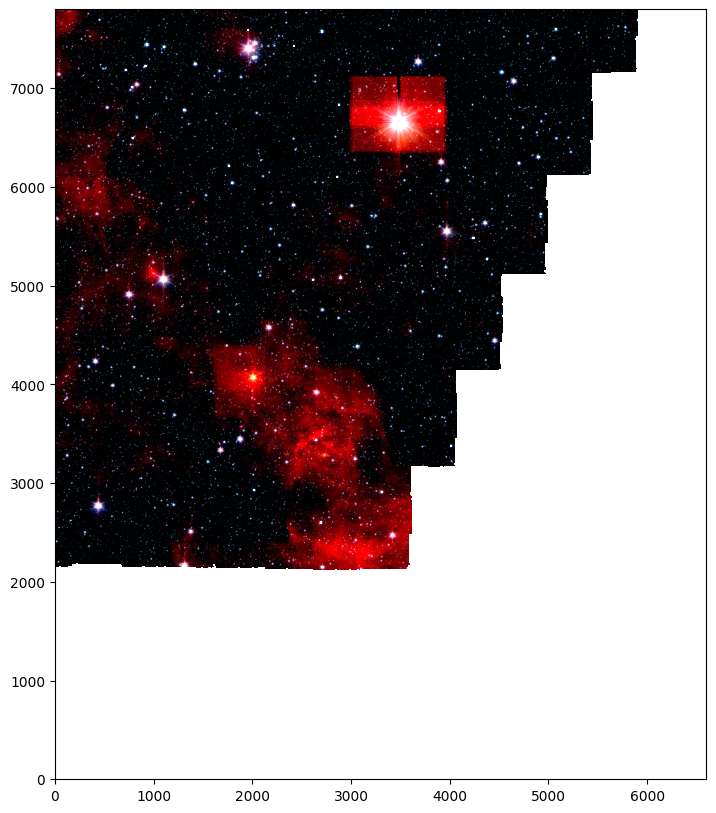

In [33]:
# Open FITS file
Red = fits.open(path + "SMOG_" + Region_Formato_2 + "_mosaic_I4.fits")
Green = fits.open(path + "SMOG_" + Region_Formato_2 + "_mosaic_I2.fits")
Blue = fits.open(path + "SMOG_" + Region_Formato_2 + "_mosaic_I1.fits")
I3 = fits.open(path + "SMOG_" + Region_Formato_2 + "_mosaic_I3.fits")

wcs_Red = WCS(Red[0].header)
wcs_Green = WCS(Green[0].header)
wcs_Blue = WCS(Blue[0].header)

# Extract RGB data
RedData = Red[0].data
GreenData = Green[0].data
BlueData = Blue[0].data
I3Data = I3[0].data

path3 = "C:\\Users\\sheli\\A. Extragalactica\\Corte Galaxias\\"


#open and read the parameters of the image
param_file = open(path3 + "Parametros_Imagenes.txt")
lst = param_file.read().split()
# Find index of the line which contains the name of the region we're analyzing.
i = lst.index(Region)
# Create a sub-list with the image parameters and convert all the strings to floats.
new_lst = (float(j) for j in lst[i+1:i+17])

red_low_limit, red_high_limit, green_low_limit, green_high_limit, blue_low_limit, blue_high_limit, I3_low_limit, I3_high_limit, red_contrast, red_bias, green_contrast, green_bias, blue_contrast, blue_bias, I3_contrast, I3_bias = new_lst

def update_image(RedData, GreenData, BlueData):
    # Apply scaling to each channel to emphasize peaks and reduce noise
    Rednorm = ds9_norm(vmin=red_low_limit, vmax=red_high_limit, bias=red_bias, contrast=red_contrast, stretch='sqrt')(RedData)
    Greennorm = ds9_norm(vmin=green_low_limit, vmax=green_high_limit, bias=green_bias, contrast=green_contrast, stretch='sqrt')(GreenData)
    Bluenorm = ds9_norm(vmin=blue_low_limit, vmax=blue_high_limit, bias=blue_bias, contrast=blue_contrast, stretch='sqrt')(BlueData)

    # Stack the normalized channels
    rgb_image = np.dstack((Rednorm, Greennorm, Bluenorm))

    # Display the RGB image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image, origin='lower')
    plt.show()
    
    return Rednorm, Greennorm, Bluenorm


new_RedScaled, new_GreenScaled, new_BlueScaled = update_image(RedData, GreenData, BlueData)


In [34]:
def I3_image(I3Data):
    # Apply scaling to each channel to emphasize peaks and reduce noise
    I3norm = ds9_norm(vmin=I3_low_limit, vmax=I3_high_limit, bias=I3_bias, contrast=I3_contrast, stretch='sqrt')(I3Data)

    # # Display the RGB image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(I3_image, origin='lower')
    # plt.show()
    
    return I3norm
    
new_I3Scaled = I3_image(I3Data)

In [35]:
#Funcion myRegion para filtro rojo
def myRegion_Red(x_coord, y_coord, image, wcs_Red, filtro, half_size=100):
    
    # Ensure the provided coordinates are in pixel units
    int_x_coord = int(x_coord)
    int_y_coord = int(y_coord)

    # Define the coordinates of the center of the region
    center_x = half_size
    center_y = half_size


    # Create a figure and axis
    fig_red, ax_red = plt.subplots(figsize=(256 * px, 256 * px), dpi=100)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

    # Extract the region using WCS information from the red channel
    cutout_red = Cutout2D(image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Red)

    # Display the region extracted with WCS
    ax_red.imshow(cutout_red.data, origin='lower')
    ax_red.set_axis_off()
    plt.margins(0,0)
    
    # Display the plot
    print(filtro)
    plt.show()
    return fig_red

In [36]:
#Funcion myRegion para filtro verde
def myRegion_Green(x_coord, y_coord, image, wcs_Red, filtro, half_size = 100):
    
    # Ensure the provided coordinates are in pixel units
    int_x_coord = int(x_coord)
    int_y_coord = int(y_coord)

    # Define the coordinates of the center of the region
    center_x = half_size
    center_y = half_size

    # Create a figure and axis
    fig_green, ax_green = plt.subplots(figsize=(256 * px, 256 * px), dpi=100)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    
    # Extract the region using WCS information from the red channel
    cutout = Cutout2D(image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Red)

    # Display the region extracted with WCS
    ax_green.imshow(cutout.data, origin='lower')
    ax_green.set_axis_off()
    plt.margins(0,0)

    # Display the plot
    print(filtro)
    plt.show()
    return fig_green

In [37]:
#Funcion myRegion para filtro azul
def myRegion_Blue(x_coord, y_coord, image, wcs_Red, filtro, half_size=100):
    
    # Ensure the provided coordinates are in pixel units
    int_x_coord = int(x_coord)
    int_y_coord = int(y_coord)

    # Define the coordinates of the center of the region
    center_x = half_size
    center_y = half_size

    # Radius of the circle that surrounds the region
    # radius = 20

    # Create a figure and axis
    fig_blue, ax_blue = plt.subplots(figsize=(256 * px, 256 * px), dpi=100)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    # Extract the region using WCS information from the red channel
    cutout = Cutout2D(image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Red)

    # Display the region extracted with WCS
    ax_blue.imshow(cutout.data, origin='lower')
    ax_blue.set_axis_off()
    plt.margins(0,0)
    
    # Display the plot
    print(filtro)
    plt.show()
    return fig_blue
    

In [38]:
#Funcion myRegion para filtro I3
def myRegion_I3(x_coord, y_coord, image, wcs_Red, filtro, half_size=50):
    
    # Ensure the provided coordinates are in pixel units
    int_x_coord = int(x_coord)
    int_y_coord = int(y_coord)

    # Define the coordinates of the center of the region
    center_x = half_size
    center_y = half_size

    # Create a figure and axis
    fig_I3, ax_I3 = plt.subplots(figsize=(256 * px, 256 * px), dpi=100)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    # Extract the region using WCS information from the red channel
    cutout = Cutout2D(image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Red)

    # Display the region extracted with WCS
    ax_I3.imshow(cutout.data, origin='lower')
    ax_I3.set_axis_off()
    plt.margins(0,0)
    
    # Display the plot
    print(filtro)
    plt.show()
    return fig_I3
    

In [39]:

def overlayFilters(x_coord, y_coord, red_image, green_image, blue_image, wcs_Red, wcs_Blue, wcs_Green, filter, half_size = 100):
    # Ensure the provided coordinates are in pixel units
    int_x_coord = int(x_coord)
    int_y_coord = int(y_coord)

    # Define the coordinates of the center of the region
    center_x = half_size
    center_y = half_size


    # Create figures and axes for each color channel
    fig_RGB, ax = plt.subplots(figsize=(256 * px, 256 * px), dpi=100)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    # Extract the regions using WCS information from the different filters
    red_cutout = Cutout2D(red_image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Red)
    green_cutout = Cutout2D(green_image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Green)
    blue_cutout = Cutout2D(blue_image, (int_x_coord, int_y_coord), (2 * half_size, 2 * half_size), wcs=wcs_Blue)

    # Combine the filters into composite RGB images
    composite_image = np.dstack((red_cutout.data, green_cutout.data, blue_cutout.data))

    # Display the composite images with WCS for each color channel
    ax.imshow(composite_image, origin='lower')
    ax.set_axis_off()
    plt.margins(0,0)
    
    # Return figures for each color channel
    return fig_RGB




In [40]:
path2 = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi galacticos\\Coordenadas\\" +Region + "\\"
# Define the filename for the table
filename = path + "region_info_" + Region + ".csv"

# Sube region file in physical coordinates
region_file_physical = path2 + "fisicas_NoGalax_" + Region + ".reg"
# Sube region file in galactic coordinates
region_file_galactic = path2 + "galacticas_NoGalax_" + Region + ".reg"

Directory already exists!
Directory already exists!
Directory already exists!
Directory already exists!
Directory already exists!
Region Galactic:
102.5945263 0.6081964

Region Physical:
-3266.9963 -1148.7346


NoOverlapError: Arrays do not overlap.

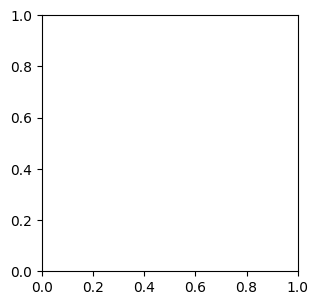

In [41]:
#Definir el directorio donde se desea guardar la imagen
RGB_dir = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi Galacticos\\No Galaxias\\" + Region + "\\RGB" + "_" + Region
red_dir = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi Galacticos\\No Galaxias\\" + Region + "\\Red" + "_" + Region
blue_dir = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi Galacticos\\No Galaxias\\" + Region + "\\Blue" + "_" + Region
green_dir = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi Galacticos\\No Galaxias\\" + Region + "\\Green" + "_" + Region
I3_dir = "C:\\Users\\sheli\\A. Extragalactica\\Objetos casi Galacticos\\No Galaxias\\" + Region + "\\I3" + "_" + Region

#########################################################################################################################
#Si el directorio no existe se crea aqui
#RGB
if not os.path.exists(RGB_dir):
    # Create the directory
    os.makedirs(RGB_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

#ROJO
if not os.path.exists(red_dir):
    # Create the directory
    os.makedirs(red_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

#AZUL
if not os.path.exists(blue_dir):
    # Create the directory
    os.makedirs(blue_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

#GREEN
if not os.path.exists(green_dir):
    # Create the directory
    os.makedirs(green_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

#I3
if not os.path.exists(I3_dir):
    # Create the directory
    os.makedirs(I3_dir)
    print("Directory created successfully!")
else:
    print("Directory already exists!")
######################################################################################################################
try:
    data_table = ascii.read(filename)
except FileNotFoundError:
    data_table = Table(names=('x_coord', 'y_coord', 'shape_label', 'description'), 
                       dtype=('f8', 'f8', 'S20', 'S100'))
    
####################################################################################################################

with open(region_file_physical, 'r') as f_physical:
    lines_physical = f_physical.readlines()

with open(region_file_galactic, 'r') as f_galactic:
    lines_galactic = f_galactic.readlines()


# Iterate over each line in the physical coordinate file
for line_physical, line_galactic in zip(lines_physical, lines_galactic):
    # Remove leading/trailing whitespace and skip empty lines
    line_physical = line_physical.strip()
    line_galactic = line_galactic.strip()
    
    # Extract the physical and Galactic coordinates
    physical_parts = line_physical.split()
    galactic_parts = line_galactic.split()
    
    physical_x_str, physical_y_str = physical_parts[0], physical_parts[1]
    x = float(physical_x_str)
    y = float(physical_y_str)

    galactic_x_str, galactic_y_str = galactic_parts[0], galactic_parts[1]
    galactic_x = float(galactic_x_str)
    galactic_y = float(galactic_y_str)

    
    #Check if the data already exists in the table
    if any((data_table['x_coord'] == galactic_x) & (data_table['y_coord'] == galactic_y)):
        # If data exists, skip
        print("Data already exists in the table for Galactic coordinates:", galactic_x_str, galactic_y_str)
        continue
      
    else:

        # Print the Galactic coordinates
        print("Region Galactic:")
        print(galactic_x_str, galactic_y_str)
        print()

        print("Region Physical:")
        print(physical_x_str, physical_y_str)

         # Functions to display images
        RGB_image = overlayFilters(x, y, new_RedScaled, new_GreenScaled, new_BlueScaled, wcs_Red, wcs_Blue, wcs_Green, "RGB", half_size = 50)
        fig_red = myRegion_Red(x, y, new_RedScaled, wcs_Red, "Rojo-8 micras", half_size = 50)
        fig_green = myRegion_Green(x, y, new_GreenScaled, wcs_Green, "Verde-4.6 micras", half_size = 50)
        fig_blue = myRegion_Blue(x, y, new_BlueScaled, wcs_Blue, "Azul-3.5 micras", half_size = 50)
        fig_I3 = myRegion_I3(x, y, new_I3Scaled, wcs_Red, "I3-5.8 micras", half_size = 50)

        #Define the name for each file
        filename_RGB = galactic_x_str + "," + galactic_y_str + "_" + Region + "_RGB-composite.jpeg"
        filename_red = galactic_x_str + "," + galactic_y_str + "_" + Region + "_Rojo-8micras.jpeg"
        filename_blue = galactic_x_str + "," + galactic_y_str + "_" + Region + "_Azul-3.5micras.jpeg"
        filename_green = galactic_x_str + "," + galactic_y_str + "_" + Region + "_Verde-4.6micras.jpeg"
        filename_I3 = galactic_x_str + "," + galactic_y_str + "_" + Region + "_I3-5.8micras.jpeg"

        
        #Save each image into its corresponding file
        RGB_image.savefig(os.path.join(RGB_dir, filename_RGB))
        print(f"Saved RGB image as: {os.path.join(RGB_dir, filename_RGB)}")
        
        fig_red.savefig(os.path.join(red_dir, filename_red), bbox_inches='tight', pad_inches=0.0)
        print(f"Saved Red image as: {os.path.join(red_dir, filename_red)}")
    
        fig_green.savefig(os.path.join(green_dir, filename_green))
        print(f"Saved Green image as: {os.path.join(green_dir, filename_green)}")
    
        fig_blue.savefig(os.path.join(blue_dir, filename_blue))
        print(f"Saved Blue image as: {os.path.join(blue_dir, filename_blue)}") #hi

        fig_I3.savefig(os.path.join(I3_dir, filename_I3))
        print(f"Saved I3 image as: {os.path.join(I3_dir, filename_I3)}") #hi


